# Module 9 Problem Set Solutions
Solutions file for Problem Set 9. 

## Introduction
In this Problem Set, we will discuss the creation of Convolutional Neural Networks (CNNs). We will use the `tensorflow` library for creating our CNN, though if you are familiar with Pytorch, you will find the methods used here to be readily applicable through `torch.nn.sequential`.

## Data
As the problems we have get more complex, the datasets we apply our problems to get similarly complex. In your own endeavours (e.g. homework), you will notice that suitable data is a bit harder to come by compared to our simpler models like KNN and Decision Trees. Suitable data for CNNs will more often than not involve images. **This is because CNN's work best with data with spatial features. In other words, the input to a CNN is best suited for spatially organized data like images. Why?**

<blockquote> 
Short Answer: CNNs are designed to capture <i>local patterns</i> in data. If the data is not spatially organized, these local patterns dont make sense. 
</blockquote>
<blockquote>
Longer Answer: The same set of learnable kernels (filters with weights that change as the model learns) is applied at different locations across the input to a CNN. This allows the network to learn and recognize the same features regardless of their position in the image, an efficient way to capture spatial hierarchies of features. Moreover, CNNs consist of multiple layers, with each layer learning increasingly abstract and complex features. Early layers might detect simple features like edges, while later layers might learn to recognize more complex structures like shapes and objects. Finally, the <i>convolution operation</i> made use of in each stage of a CNN is particularly well-suited for capturing local spatial relationships.   
</blockquote>

Often, especially with medical data, you will need to sign a licensing agreement to deal with real data. Moreover, these datasets will often require a lot of storage to deal with (more than GitHub would be happy with me uploading). Because of this limitiation, this problem set tackles one of the more "typical" CNN datasets - the MNIST digits dataset. 

The MNIST handwritten digits dataset is a widely used benchmark in machine learning, containing a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9). It consists of 60,000 training images and 10,000 testing images, with each image depicting a single digit written by various individuals. 

Fortunately for us, tensorflow (and pytorch as well) has an instance of this dataset built in.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

tf.random.set_seed(3621)

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exploring the dataset
print(f"Shape of training images: {x_train.shape}")
print(f"Shape of testing images: {x_test.shape}")
print(f"Number of classes: {len(set(y_train))}")  # The built-in set type works exactly like sets in math - a list with no duplicates.

2023-10-19 13:28:15.818216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Shape of training images: (60000, 28, 28)
Shape of testing images: (10000, 28, 28)
Number of classes: 10


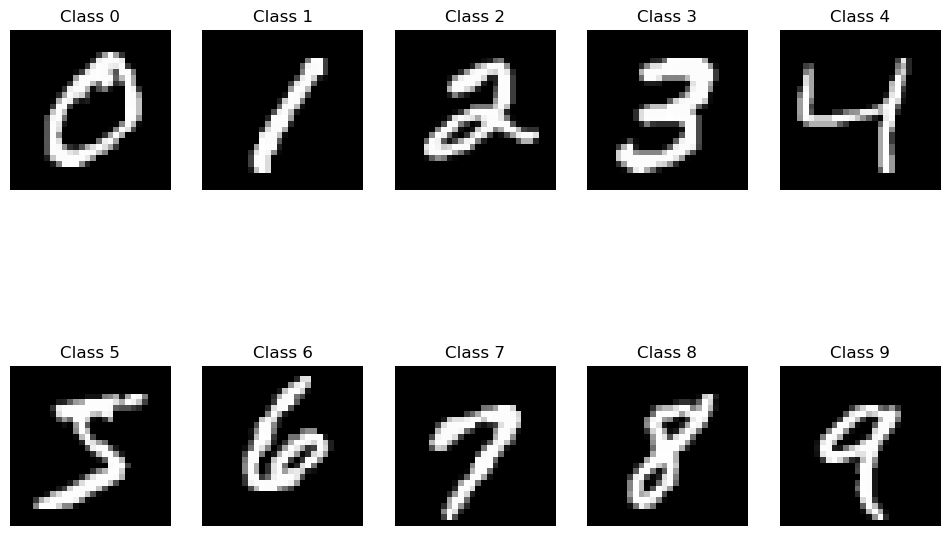

In [2]:
import matplotlib.pyplot as plt

# Create a dictionary to group images by their class (digit)
class_images = {i: [] for i in range(10)}

# Populate the dictionary with images
for i in range(len(x_train)):
    class_label = y_train[i]
    class_images[class_label].append(x_train[i])

# Plot a few examples from each class
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(class_images[i][0], cmap='gray')  # Display the first image of each class
    plt.title(f"Class {i}")
    plt.axis('off')

plt.show()

**With the information and output from cells above, describe the task of our CNN - what are we trying to do? Is this classification or regression? What are suitable loss functions/error metrics for training?**

> This is classification, in particular multiclass classification. We have 10 classes to predict (one for each digit). Some suitable loss functions for multiclass classification are categorical cross entropy (which I use in the code), hinge loss, or center loss. A typical error metric is accuracy, but there are plenty of others.

## Model Creation

### Preprocessing

In [3]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Preprocess the data
## Input data (images): make sure all data is 28x28x1 arrays with datatype float32 (32 bit float)
##             and scale by 255 (max value for any pixel) so that all input is in between 0 and 1.
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0 
## Targets (classes): one-hot encode by using the to_categorical function
y_train = to_categorical(y_train, 10)


**Do we need to perform the same preprocessing steps to our testing data? Only some of the steps? Explain your answer? If preprocessing is necessary, use the following cell to preprocessing the testing data.**

> Yes! We definitely need to perform the same preprocessing steps for our training data. If we didnt, the model would be training on data that was of a different format than our training data (i.e., the images would be a different shape, different type (maybe float64), or scaled differently).

In [4]:
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### Defining the model

In [5]:
from tensorflow.keras import layers, models

# Create a simple CNN model
## Start with tensorflow.keras.models.Sequential()
model = models.Sequential()

#Proceed to add layers with models.add()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2023-10-19 13:28:18.865682: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Training the model
The cell below compiles our model (in other words, finalizes its shape) and then fits the model to our data over 5 epochs. **However, *something is wrong with the code* - what is it? Before running the code, implement a fix for this problem**

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 75s 79ms/step - loss: 0.1817 - accuracy: 0.9463 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 2/5
938/938 [==============================] - 72s 77ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0460 - val_accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 65s 70ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0387 - val_accuracy: 0.9871
Epoch 4/5
938/938 [==============================] - 73s 78ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0311 - val_accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0317 - val_accuracy: 0.9896


> The problem is that we are using our test data as validation data for our model - this is data leakage!!! We need to split our training data into subsets for validation and testing. I do this below with train_test_split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=3621)

# The compilation code was okay
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
750/750 [==============================] - 54s 71ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0191 - val_accuracy: 0.9941
Epoch 2/5
750/750 [==============================] - 59s 79ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0230 - val_accuracy: 0.9927
Epoch 3/5
750/750 [==============================] - 52s 70ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0233 - val_accuracy: 0.9935
Epoch 4/5
750/750 [==============================] - 52s 69ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 5/5
 94/750 [==>...........................] - ETA: 50s - loss: 0.0067 - accuracy: 0.9975

### Evaluate the model

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

In [ ]:
import numpy as np
# Use the trained model to make predictions on the test data
predictions = model.predict(x_test)

# Find misclassified images
misclassified_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

# Visualize 5 correct predictions
n_examples = 5 

plt.figure(figsize=(12, 8))
for i in range(n_examples):
    plt.subplot(2, n_examples, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    actual_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}") 
    plt.axis('off')

plt.show()


# Visualize 5 incorrect predictions if they exist
n_examples = min(5, len(misclassified_indices)) 

plt.figure(figsize=(12, 8))
for i in range(n_examples):
    index = misclassified_indices[i]
    plt.subplot(2, n_examples, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    actual_label = np.argmax(y_test[index])
    predicted_label = np.argmax(predictions[index])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", color='red')  # Highlight misclassifications in red
    plt.axis('off')
plt.show()

**Evaluate our model? Does it perform well? Are there things we could do to improve its performance or tweak our model? Give some concrete examples.**

> Our model obtains a high accuracy (98.64%) and seems to be predicting well generally. However, it still has some errors on our test set. We could perfrom data augmentation, implement cross validation, add more layers to our model, or finetune hyperparameters for our model (like learning rate, batch size, or optimizer).